

Dataset - https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv 

### librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')




### Analisis y carga del dataset

In [2]:
df = pd.read_csv ('./data/cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Entrenamiento y puntuación de los modelos ML

In [9]:
y = df['diagnosis']
X = df.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [10]:
def model_test_classification(x, y, use_cross_val=False, cv=5, plot=True, average='binary', pos_label='M'):

    if y.dtype == 'O' or isinstance(y.iloc[0], str) or isinstance(y[0], str):
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        pos_label_num = le.transform([pos_label])[0]
    else:
        y_encoded = y
        pos_label_num = pos_label

    models = [
        LogisticRegression(max_iter=5000),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        SVC(probability=True),
        KNeighborsClassifier(),
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        LGBMClassifier(),
        CatBoostClassifier(verbose=0)
    ]

    model_names = [
        "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting",
        "Naive Bayes", "SVM", "KNN", "XGBoost", "LightGBM", "CatBoost"
    ]

    # Definimos una paleta con un color distinto por modelo
    colores = sns.color_palette("tab10", n_colors=len(models))

    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    for model in models:
        if use_cross_val:
            y_pred = cross_val_predict(model, x, y_encoded, cv=cv, method='predict')
            if hasattr(model, "predict_proba"):
                y_proba = cross_val_predict(model, x, y_encoded, cv=cv, method='predict_proba')[:, 1]
            else:
                y_proba = None
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(x_test)[:, 1]
            else:
                y_proba = None

        y_true = y_test if not use_cross_val else y_encoded

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, average=average, zero_division=0, pos_label=pos_label_num)
        rec = recall_score(y_true, y_pred, average=average, zero_division=0, pos_label=pos_label_num)
        f1 = f1_score(y_true, y_pred, average=average, zero_division=0, pos_label=pos_label_num)

        if y_proba is not None and len(np.unique(y_true)) == 2:
            roc_auc = roc_auc_score(y_true, y_proba)
        else:
            roc_auc = np.nan

        acc_scores.append(np.round(acc * 100, 2))
        precision_scores.append(np.round(prec * 100, 2))
        recall_scores.append(np.round(rec * 100, 2))
        f1_scores.append(np.round(f1 * 100, 2))
        roc_auc_scores.append(np.round(roc_auc * 100, 2) if not np.isnan(roc_auc) else None)

    results = pd.DataFrame({
        "Model": model_names,
        "Accuracy (%)": acc_scores,
        "Precision (%)": precision_scores,
        "Recall (%)": recall_scores,
        "F1 Score (%)": f1_scores,
        "ROC AUC (%)": roc_auc_scores
    }).sort_values(by="F1 Score (%)", ascending=False)

    print(results)

    if plot:
        metrics_to_plot = ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1 Score (%)"]
        if results["ROC AUC (%)"].notna().all():
            metrics_to_plot.append("ROC AUC (%)")

        for metric in metrics_to_plot:
            plt.figure(figsize=(10, 5))
            # Usamos la paleta definida, ordenada según los modelos en el DataFrame:
            sns.barplot(data=results, x="Model", y=metric, palette=colores)
            plt.title(f"Model Comparison - {metric}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

    return results


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

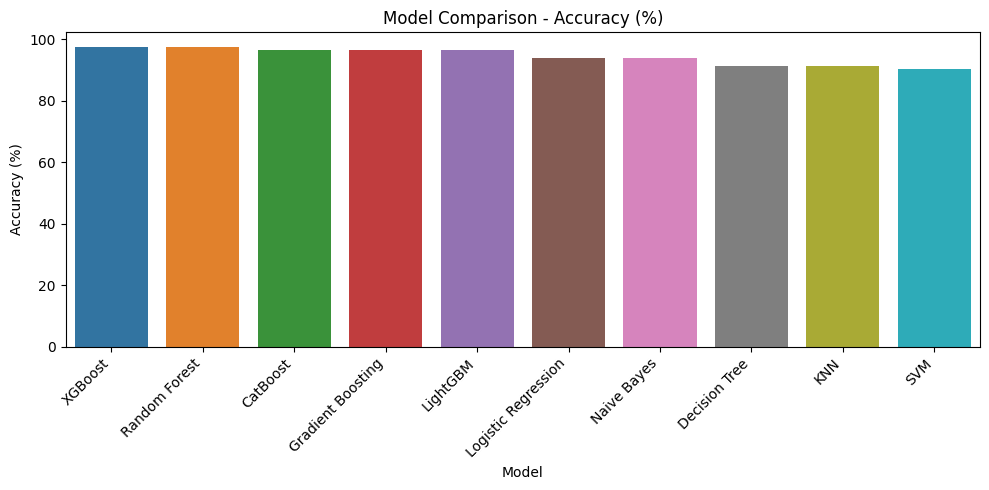

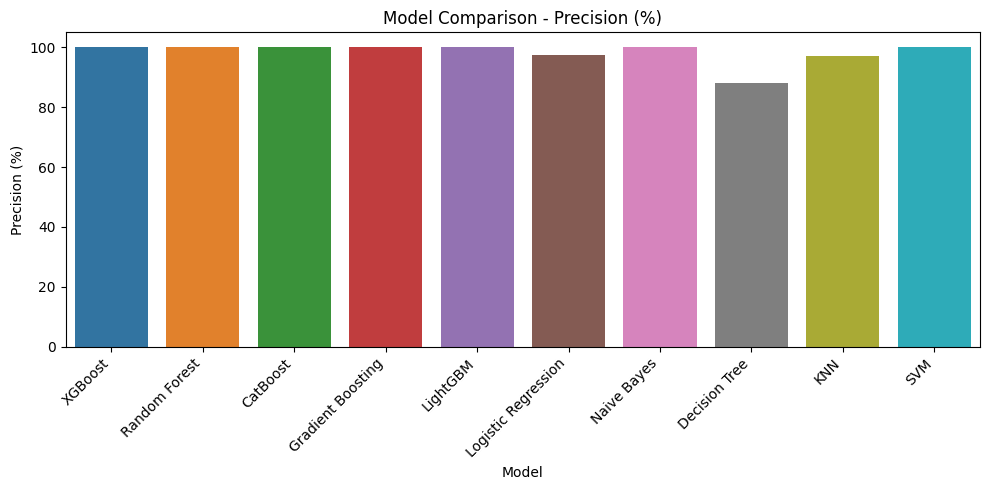

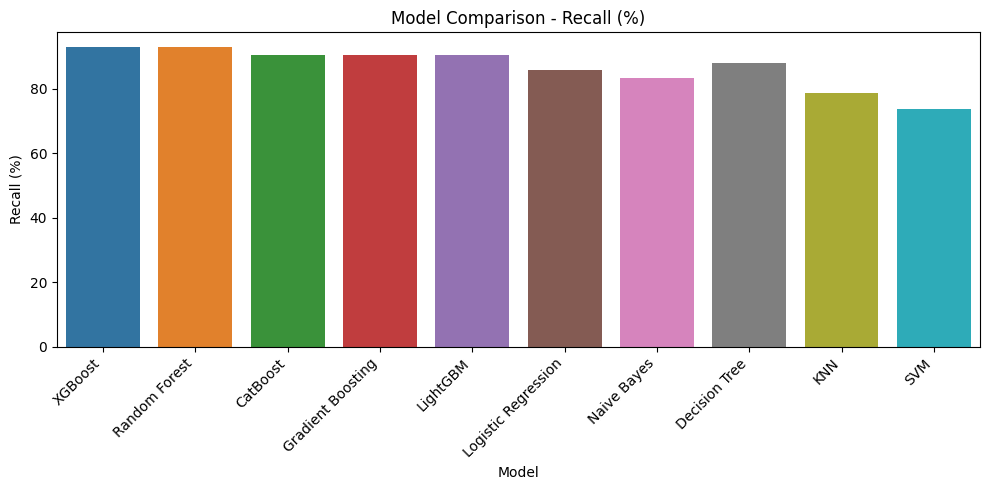

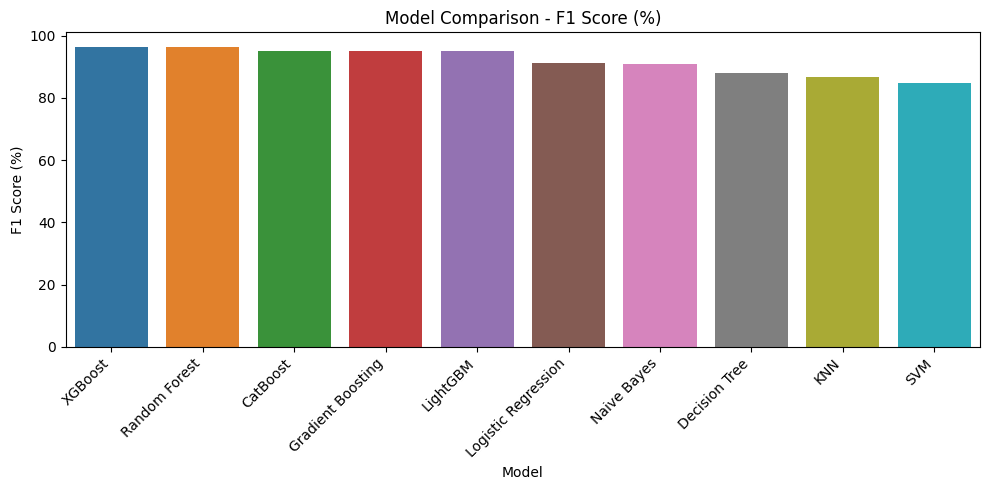

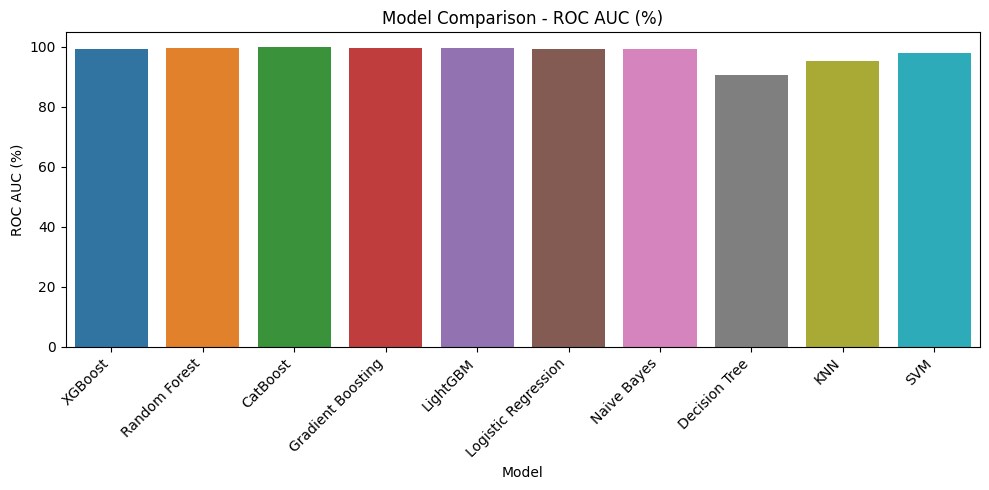

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%),ROC AUC (%)
7,XGBoost,97.37,100.00,92.86,96.30,99.40
2,Random Forest,97.37,100.00,92.86,96.30,99.57
9,CatBoost,96.49,100.00,90.48,95.00,99.87
3,Gradient Boosting,96.49,100.00,90.48,95.00,99.54
8,LightGBM,96.49,100.00,90.48,95.00,99.67
0,Logistic Regression,93.86,97.30,85.71,91.14,99.24
4,Naive Bayes,93.86,100.00,83.33,90.91,99.34
1,Decision Tree,91.23,88.10,88.10,88.10,90.58
6,KNN,91.23,97.06,78.57,86.84,95.47
5,SVM,90.35,100.00,73.81,84.93,98.08


In [11]:
model_test_classification(X, y, use_cross_val=False, plot=True)


### Modelo final 

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



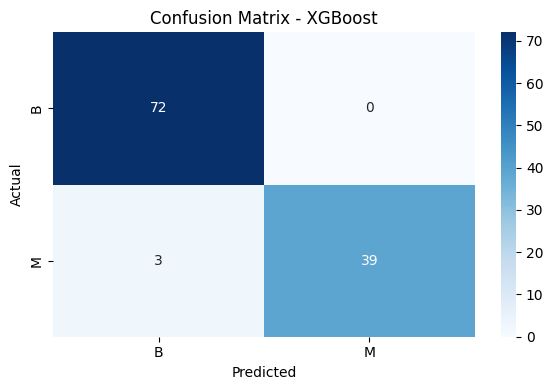

In [12]:
# Codificar etiquetas de y si son texto
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # convierte 'B','M' a 0,1

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Crear el modelo XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar
model_xgb.fit(x_train, y_train)

# Predecir
y_pred = model_xgb.predict(x_test)

# Evaluar
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()
